In [33]:
import pandas as pd

%matplotlib inline

In [12]:
df = pd.read_csv("data/un-general-debates-blueprint.csv")
df.sample(2)

,session,year,country,country_name,speaker,position,text
1017,33,1978,HND,Honduras,Palma Galvez,NaN,﻿293.\tMy presence in this hall at the thirty-...
4025,52,1997,MDG,Madagascar,Herizo Razafimahaleo,Deputy Prime Minister,﻿The success of a\nsession of our General Asse...


**Viewing columns**

In [13]:
cols = " | ".join(list(df.columns))
print("columns:", cols)

columns: session | year | country | country_name | speaker | position | text


**Viewing number of rows and cols**

In [11]:
df.shape

(7507, 7)

### Getting an overview of the data with pandas

1. calculate summary statistics
2. check for missing values
3. plot distributions of interesting attributes
4. compare distributions across categorires
5. visualize developments over time

In [16]:
df.columns

Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text'],
      dtype='object')

In [17]:
df.dtypes

session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
 7   length        7507 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 469.3+ KB


**Calculating summary statistics for columns**

Tip: Transpose the columns `df.describe().T` for better visualization.

In [21]:
df["length"] = df["text"].str.len()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


**Summary for non-numerical columns**

A summary for non-numerical columns can be produced by specifying `include='O'` (alias for `np.object`).

In [24]:
df[["country", "speaker"]].describe(include="O").T

,count,unique,top,freq
country,7507,199,MAR,46
speaker,7480,5428,Seyoum Mesfin,12


**Checking for missing data**

In [27]:
# isna() is just an alias to isnull(), but shorter.
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

In [28]:
df["speaker"].fillna("uknown", inplace=True)

In [29]:
# Ambiguous/different spellings for a given speaker name.
df[df["speaker"].str.contains("Bush")]["speaker"].value_counts()

George W. Bush        4
Mr. George W. Bush    2
Mr. George W Bush     1
Bush                  1
George Bush           1
Name: speaker, dtype: int64

**Plotting Value Distributions**

<AxesSubplot:>

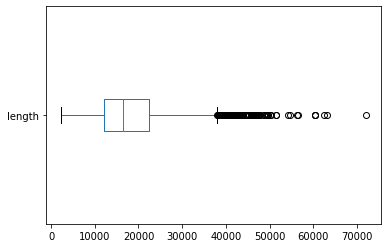

In [30]:
df["length"].plot(kind="box", vert=False)

<AxesSubplot:ylabel='Frequency'>

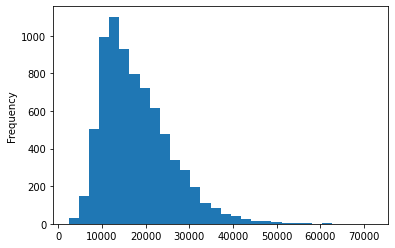

In [34]:
df["length"].plot(kind="hist", bins=30)

**Comparing Value Distributions across categories**

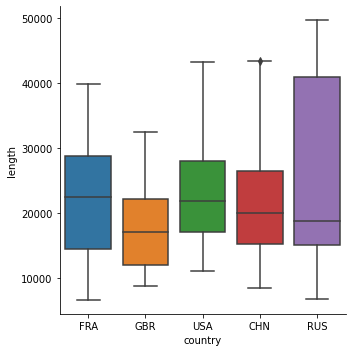

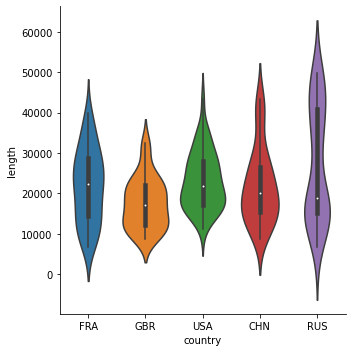

In [35]:
import seaborn as sns

where = df["country"].isin(["USA", "FRA", "GBR", "CHN", "RUS"])
sns.catplot(data=df[where], x="country", y="length", kind="box")
sns.catplot(data=df[where], x="country", y="length", kind="violin")

**Visualizing developments over time**

<AxesSubplot:title={'center':'Number of Countries'}, xlabel='year'>

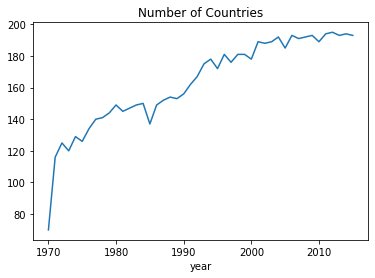

In [39]:
df.groupby("year").size().plot(title="Number of Countries")

<AxesSubplot:title={'center':'Avg. Speech Length'}, xlabel='year'>

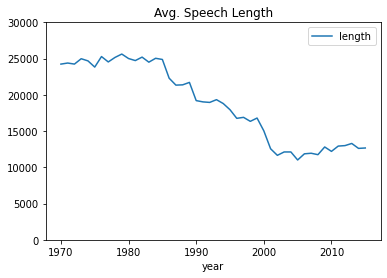

In [40]:
df.groupby("year").agg({"length": "mean"}).plot(
    title="Avg. Speech Length", ylim=(0, 30000)
)